train_data.shape= (10476, 25)
test_data.shape= (2994, 25)
test_data.shape= (1497, 25)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 25, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 25, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 25, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,084 (855.80 KB)

 Trainable params: 219,084 (855.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.3462 - loss: 1.8361 - val_acc: 0.7341 - val_loss: 0.9338
Epoch 2/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7126 - loss: 0.8700 - val_acc: 0.7876 - val_loss: 0.6636
Epoch 3/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7850 - loss: 0.6486 - val_acc: 0.8016 - val_loss: 0.5682
Epoch 4/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8016 - loss: 0.5692 - val_acc: 0.8130 - val_loss: 0.5357
Epoch 5/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8129 - loss: 0.5366 - val_acc: 0.8196 - val_loss: 0.5183
Epoch 6/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8199 - loss: 0.5351 - val_acc: 0.8163 - val_loss: 0.5150
Epoch 7/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8271 - loss: 0.5159 - val_acc: 0.8290 - val_loss: 0.4968
Epoch 8/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8329 - loss: 0.5034 - val_acc: 0.8277 - val_loss: 0.4924
Epoch 9/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/

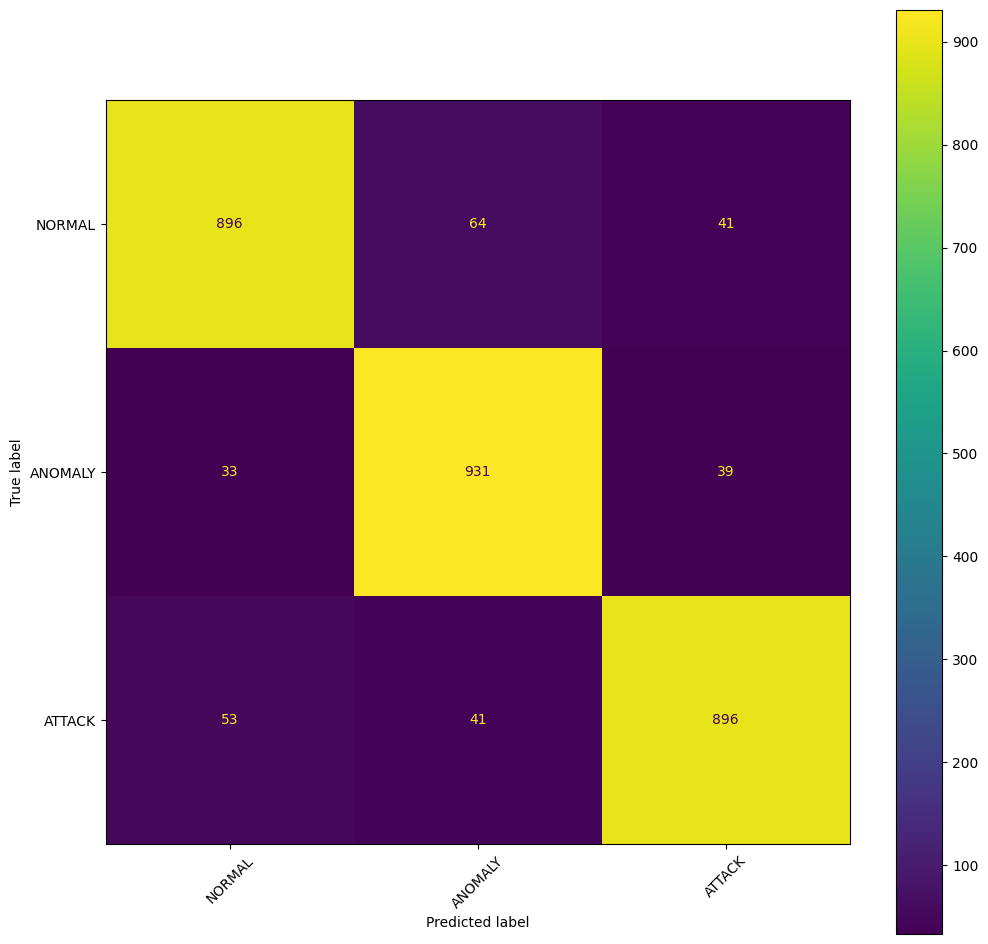

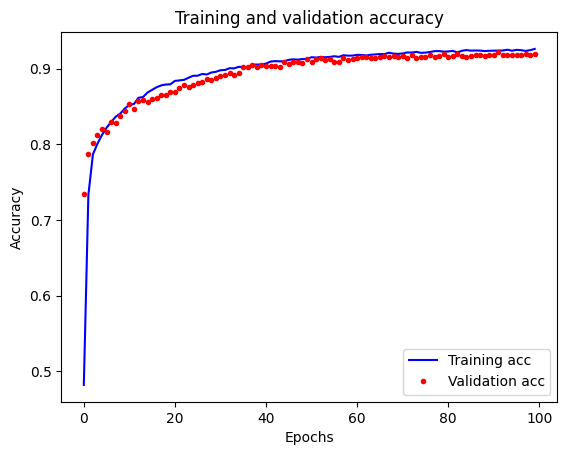

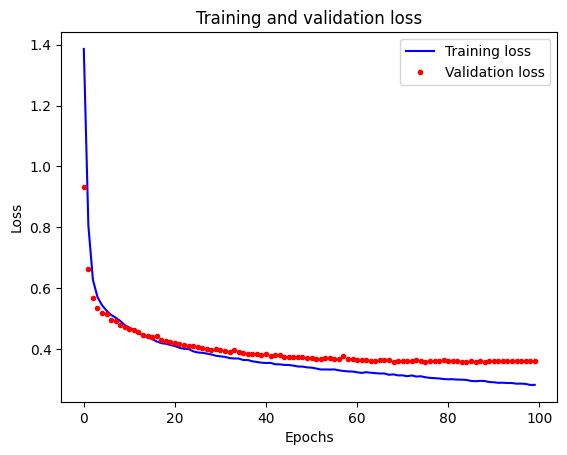

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
An example Intrusion Detection application using Dense, Conv1d and Lstm layers
please cite below works if you find it useful:
Akgun, Devrim, Selman Hizal, and Unal Cavusoglu. "A new DDoS attacks intrusion detection 
model based on deep learning for cybersecurity." Computers & Security 118 (2022): 102748.

Hizal, Selman, Ünal ÇAVUŞOĞLU, and Devrim AKGÜN. "A New Deep Learning Based Intrusion 
Detection System for Cloud Security." 2021 3rd International Congress on Human-Computer 
Interaction, Optimization and Robotic Applications (HORA). IEEE, 2021.
"""


import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
from models import models_ddos


epochs = 100
nclass = 12 

def loadDataset():
    # Put dataset path here ! 
    filename='Data/pcap_data.csv'    

    trainfile = pd.read_csv(filename)    
    data = pd.DataFrame(trainfile).to_numpy()
    # data=data[data[:,67]!='DrDoS_LDAP']        
    np.random.shuffle(data)
    
    # label = data[:, 67].astype('str')
    label = data[:, 25].astype('str')

    label[label == 'NORMAL']  = 0
    label[label == 'ANOMALY'] = 1
    label[label == 'ATTACK']  = 2

    # label[label == 'WebDDoS']       = 0
    # label[label == 'BENIGN']        = 1
    # label[label == 'UDP-lag']       = 2
    # label[label == 'DrDoS_NTP']     = 3
    # label[label == 'Syn']           = 4
    # label[label == 'DrDoS_SSDP']    = 5
    # label[label == 'DrDoS_UDP']     = 6
    # label[label == 'DrDoS_NetBIOS'] = 7
    # label[label == 'DrDoS_MSSQL']   = 8
    # label[label == 'DrDoS_SNMP']    = 9
    # label[label == 'TFTP']          = 10
    # label[label == 'DrDoS_DNS']     = 11
    #label[label == 'DrDoS_LDAP']     = 11
   
    # SELECT FEATURES ----------------------------------------------------
    # inx_sel=-1+np.array([38,47,37,48,11,9,7,52,10,36,1,34,4,17,19,57,21,
    #                      18,22,24,32,50,23,55,51,5,3,39,40,43,58,12,25,
    #                      20,2,35,67,33,6,53])

    inx_sel=-1+np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
  
    
    # MIN-MAX normalization
    data=data[:,inx_sel]
    dmin = data.min(axis=0)
    dmax = data.max(axis=0)
    data=(data-dmin)/(dmax-dmin)
    # data = np.log(data-dmin+1.0)    
     

    # Test data 20%
    train_data, test_data, train_label, test_label = \
        train_test_split(data, label, test_size=0.20, stratify=label)
        
    # Train 70%, Validation%10
    train_data, val_data, train_label, val_label = \
        train_test_split(train_data, train_label,test_size=0.125, stratify=train_label)


    # return train_data.astype('float32'), train_label.astype('int32'), \
    #     val_data.astype('float32'), val_label.astype('int32'), \
    #         test_data.astype('float32'), test_label.astype('int32')

    return train_data.astype('float32'), train_label.astype('float32'), \
        val_data.astype('float32'), val_label.astype('float32'), \
            test_data.astype('float32'), test_label.astype('float32')

# -- LOAD DATA -----------------------------------------------------------------
train_data, train_labelp, val_data, val_labelp, test_data, test_labelp = loadDataset()

# to_categorical
train_label = to_categorical(train_labelp, nclass)
val_label   = to_categorical(val_labelp,   nclass)
test_label  = to_categorical(test_labelp,  nclass)

print('train_data.shape=', train_data.shape)
print('test_data.shape=',  test_data.shape)
print('test_data.shape=',  val_data.shape)

#get the number of features
inshape=train_data.shape[1]

# Class balancing weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(
                                                      train_labelp),
                                                  y=train_labelp)


class_weights = {i: class_weights[i] for i in range(len(class_weights))}


# -- CALLBACKS -----------------------------------------------------------------
earlyStopping = EarlyStopping(monitor='val_loss',
                              patience=30,
                              verbose=0,
                              mode='min')

# modelCheckPoint = ModelCheckpoint('./savemodels/model5class.weights.{epoch:03d}-{val_acc:.4f}.hdf5',
modelCheckPoint = ModelCheckpoint('./savemodels/model5class.weights.{epoch:03d}-{val_acc:.4f}.keras',
                                  save_best_only=True,
                                  monitor='val_acc',
                                  mode='max')

# reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss',
#                                   factor=0.1,
#                                   patience=7,
#                                   verbose=1,
#                                   epsilon=1e-4,
#                                   mode='min')

# -- Baseline models-----------------------------------------------------------

# -- Conv1d
model=models_ddos.model_conv1D(lr=1e-4,N=64,inshape=inshape)
# -- Dense
# model=models_ddos.model_dense(lr=1e-4,N=64,inshape=inshape)
# -- LSTM
# model=models_ddos.model_lstm(lr=1e-4,N=64,inshape=inshape)

model.summary()
# -----------------------------------------------------------------------------
# print model to an image file
# dot_img_file = 'model1.png'
# plot_model(model, to_file=dot_img_file, show_shapes=True)

# -- TRAIN MODEL --------------------------------------------------------------
history = model.fit(train_data,
                    train_label,
                    shuffle=True,
                    epochs=epochs,
                    batch_size=64, #256,  # 256,#128,#32, 64
                    # validation_data=validation_generator,
                    # validation_split=0.2,
                    # validation_data=(val_data,val_label),
                    validation_data=(val_data, val_label),
                    callbacks=[modelCheckPoint],
                    class_weight=class_weights) #,
                    # workers=3)

# -- Load best model ----------------------------------------------------------
str_models = os.listdir('./savemodels')
str_models = np.sort(str_models)
best_model = str_models[str_models.size-1]
print('best_model=', best_model)
model.load_weights('./savemodels/'+best_model)

# --Confusion matrix ----------------------------------------------------------
print('TEST DATA-Confusion matrix:')  
pred = model.predict(test_data)
pred_y = pred.argmax(axis=-1)

cm = confusion_matrix(test_labelp.astype('int32'), pred_y)
print(cm)

print('Accuracy ratios for each class')
print('NORMAL  =', cm[0, 0]/np.sum(cm[0, :]))
print('ANOMALY =', cm[1, 1]/np.sum(cm[1, :]))
print('ATTACK  =', cm[2, 2]/np.sum(cm[2, :]))
# print('DrDoS_NTP    =', cm[3, 3]/np.sum(cm[3, :]))
# print('Syn          =', cm[4, 4]/np.sum(cm[4, :]))
# print('DrDoS_SSDP   =', cm[5, 5]/np.sum(cm[5, :]))
# print('DrDoS_UDP    =', cm[6, 6]/np.sum(cm[6, :]))
# print('DrDoS_NetBIOS=', cm[7, 7]/np.sum(cm[7, :]))
# print('DrDoS_MSSQL  =', cm[8, 8]/np.sum(cm[8, :]))
# print('DrDoS_SNMP   =', cm[9, 9]/np.sum(cm[9, :]))
# print('TFTP         =', cm[10,10]/np.sum(cm[10, :]))
# print('DrDoS_DNS    =', cm[11,11]/np.sum(cm[11, :]))


# -- Confusion matrix plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# label=np.array(["WebDDoS","BENIGN","UDP-lag","DrDoS_NTP","Syn ",
#                 "DrDoS_SSDP","DrDoS_UDP","DrDoS_NetBIOS","DrDoS_MSSQL",
#                 "DrDoS_SNMP","TFTP","DrDoS_DNS"])

label=np.array(["NORMAL", "ANOMALY", "ATTACK"])


cmo = ConfusionMatrixDisplay(cm,display_labels=label)
fig, ax = plt.subplots(figsize=(12,12))
cmo.plot(ax=ax, xticks_rotation=45)


# Plot training and validation accurry and loss graphs
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

np.save('historydata.npy',[acc,val_acc,loss,val_loss])
[acc, val_acc, loss, val_loss] = np.load('historydata.npy')

plt.figure()
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

